In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#import tensorflow
from sklearn.preprocessing import OrdinalEncoder


In [2]:
df = pd.read_csv(r"C:\Users\khlds\Downloads\archive (1)\Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0


In [3]:
df.drop(["RowNumber","CustomerId","Surname"],axis=1,inplace=True)

In [4]:
df = df.drop_duplicates()
df.duplicated().sum()

0

In [5]:
df.isna().sum()

CreditScore        0
Geography          1
Gender             0
Age                1
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          1
IsActiveMember     1
EstimatedSalary    0
Exited             0
dtype: int64

In [6]:
print(df["Geography"].mode()[0])
print(df["Age"].median())
print(df["HasCrCard"].median())
print(df["IsActiveMember"].median())

France
37.0
1.0
1.0


In [7]:
df["Geography"] = df["Geography"].fillna(df["Geography"].mode()[0])
df["Age"]= df["Age"].fillna(df["Age"].median())
df["HasCrCard"]=df["HasCrCard"].fillna(df["HasCrCard"].median())
df["IsActiveMember"] = df["IsActiveMember"].fillna(df["IsActiveMember"].median())

In [8]:
df.isna().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [9]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.922903,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487128,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


0    7963
1    2037
Name: Exited, dtype: int64


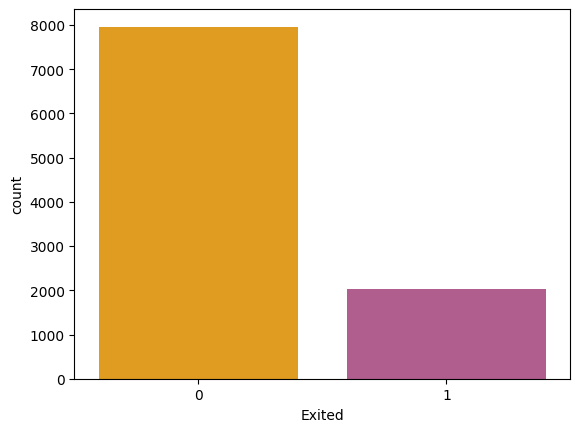

In [10]:
cols=["#ffa600","#bc5090"]
sns.countplot(x=df["Exited"],palette=cols)
print(df["Exited"].value_counts())

In [11]:
df = df.drop(df.index[0])

exited = df[df['Exited'] == 1]

not_exited = df[df['Exited'] == 0]

n_not_exited = len(not_exited)

exited_upsampled = exited.sample(n_not_exited, replace=True)

df_upsampled = pd.concat([exited_upsampled, not_exited])

df = df_upsampled.sample(frac=1, random_state=42).reset_index(drop=True)

df.to_csv(r'C:\Users\khlds\OneDrive\Documents\Data Sets\Customer churn\cleaned_data.csv', index=False)

1    7963
0    7963
Name: Exited, dtype: int64


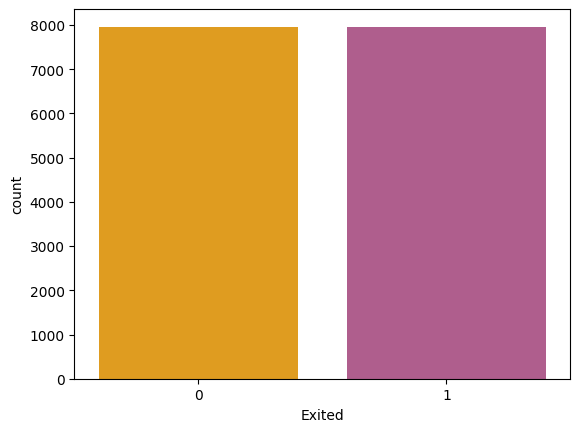

In [12]:
cols=["#ffa600","#bc5090"]
sns.countplot(x=df["Exited"],palette=cols)
print(df["Exited"].value_counts())

In [13]:
df = pd.read_csv(r'C:\Users\khlds\OneDrive\Documents\Data Sets\Customer churn\cleaned_data.csv')
df['NumOfProducts'].value_counts()

1    9264
2    5526
3     913
4     223
Name: NumOfProducts, dtype: int64

In [14]:
a = ["Geography","Gender"] 
en_ = OrdinalEncoder()     
df[a] = en_.fit_transform(df[a])
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,395,1.0,0.0,34.0,5,106011.59,1,1.0,1.0,17376.57,1
1,591,0.0,0.0,56.0,9,128882.49,1,1.0,1.0,196241.94,1
2,690,0.0,1.0,54.0,5,0.00,1,1.0,0.0,12847.61,1
3,652,0.0,1.0,31.0,2,119148.55,1,0.0,0.0,149740.22,0
4,646,0.0,1.0,26.0,4,139848.17,1,1.0,0.0,164696.27,0


In [15]:
a1 = ['CreditScore','Age', 'Tenure', 'Balance','EstimatedSalary']

from sklearn.preprocessing import MinMaxScaler

mix_scaler = MinMaxScaler()
df[a1]= mix_scaler.fit_transform(df[a1])
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0.090,1.0,0.0,0.216216,0.5,0.422528,1,1.0,1.0,0.086833,1
1,0.482,0.0,0.0,0.513514,0.9,0.513685,1,1.0,1.0,0.981246,1
2,0.680,0.0,1.0,0.486486,0.5,0.000000,1,1.0,0.0,0.064186,1
3,0.604,0.0,1.0,0.175676,0.2,0.474888,1,0.0,0.0,0.748715,0
4,0.592,0.0,1.0,0.108108,0.4,0.557390,1,1.0,0.0,0.823502,0


In [21]:
from scipy.stats import chi2_contingency
from sklearn.preprocessing import LabelEncoder

features = df.drop('Exited', axis=1)
target = df['Exited']

# Encode categorical features
cat_features = features.select_dtypes(include=['object']).columns
for feature in cat_features:
    le = LabelEncoder()
    features[feature] = le.fit_transform(features[feature])

# Perform chi-square test for each feature
chi2_scores = []
p_values = []

for feature in features.columns:
    contingency_table = pd.crosstab(features[feature], target)
    chi2, p_value, _, _ = chi2_contingency(contingency_table)
    chi2_scores.append(chi2)
    p_values.append(p_value)

# Create a DataFrame to store the results
results = pd.DataFrame({'Feature': features.columns, 'Chi2 Score': chi2_scores, 'p-value': p_values})

# Sort the results by p-value in ascending order
results = results.sort_values(by='p-value')

# Print the results
print(results)


           Feature    Chi2 Score        p-value
3              Age   3237.284094   0.000000e+00
6    NumOfProducts   2940.095945   0.000000e+00
9  EstimatedSalary  15926.000000  2.690756e-283
5          Balance  11142.783383  4.270565e-268
1        Geography    672.892460  7.642911e-147
8   IsActiveMember    577.971926  1.035689e-127
0      CreditScore   1338.826923   6.047027e-87
2           Gender    302.265645   1.057231e-67
4           Tenure     48.104480   5.939922e-07
7        HasCrCard      0.878122   3.487166e-01


In [26]:
df = pd.read_csv(r'C:\Users\khlds\OneDrive\Documents\Data Sets\Customer churn\cleaned_data.csv')
features=df.drop(['Exited','Geography','IsActiveMember','Gender','Tenure','HasCrCard'],axis=1)
features.head()

,CreditScore,Age,Balance,NumOfProducts,EstimatedSalary
0,395,34.0,106011.59,1,17376.57
1,591,56.0,128882.49,1,196241.94
2,690,54.0,0.00,1,12847.61
3,652,31.0,119148.55,1,149740.22
4,646,26.0,139848.17,1,164696.27


In [27]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(features,df['Exited'],test_size=0.20,random_state=43)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(12740, 5)
(12740,)
(3186, 5)
(3186,)


In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,precision_score,recall_score,f1_score

RF = RandomForestClassifier(random_state=43)

RF.fit(x_train,y_train)

RF_y_pred = RF.predict(x_test)
acc=accuracy_score(RF_y_pred,y_test)
print('accuracy:',acc)
print(confusion_matrix(y_test,RF_y_pred))
print(classification_report(y_test,RF_y_pred))

accuracy: 0.9328311362209667
[[1411  173]
 [  41 1561]]
              precision    recall  f1-score   support

           0       0.97      0.89      0.93      1584
           1       0.90      0.97      0.94      1602

    accuracy                           0.93      3186
   macro avg       0.94      0.93      0.93      3186
weighted avg       0.94      0.93      0.93      3186

